# Numerical Calculus

Throughout this section and the next ones, we shall cover the topic of numerical calculus. Calculus has been identified since ancient times as a powerful toolkit for analysing and handling geometrical problems. Since differential calculus was developed by Newton and Leibniz (in its actual notation), many different applications have been found, at the point that most of the current science is founded on it (e.g. differential and integral equations). Due to the ever increasing complexity of analytical expressions used in physics and astronomy, their usage becomes more and more impractical, and numerical approaches are more than necessary when one wants to go deeper. This issue has been identified since long ago and many numerical techniques have been developed. We shall cover only the most basic schemes, but also providing a basis for more formal approaches.

* there will be simple questions at the end of the class

# Numerical Differentiation

According to the formal definition of differentiation, given a function $f(x)$ such that $f(x)\in C^1[a,b]$, the first order derivative is given by

$$\frac{d}{dx}f(x) = f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

However, when $f(x)$ exhibits a complex form or is a numerical function (only a discrete set of points are known), this expression becomes unfeasible. In spite of this, this formula gives us a very first rough way to calculate numerical derivatives by taking a finite interval $h$, i.e.

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

where the function must be known at least in $x_0$ and $x_1 = x_0+h$, and $h$ should be small enough.

### QA: The derivative is the tangent or the slope at the point of the evaluation
(for the numerical analysis we can replace $h \rightarrow \Delta x$)

[//]:  $$ \left.\frac{d f}{d x}\right|_{x_i} = \lim\limits_{\Delta x \to 0} \frac{f(x_i + \Delta x) - f(x_i)}{\Delta x}$$

$$ \left.\frac{d f}{d x}\right|_{x_i} \approx \frac{\Delta f}{\Delta x} = \frac{f(x_i + \Delta x) - f(x_i)}{\Delta x}$$

* or if our data is stored in arrays
$$ f'(x_i) \approx \frac{f(x_{x+1}) - f(x_i)}{x_{i+1} -x_i} $$

<img src="imgs/tangent_num.png" width="300" />

<img src="imgs/tangent.png" width="300" />


## Example 1 Numerical differentiation

Take a function $f(x) = x^3$ and evaluate the first derivative of that function using the previous numerical scheme at the point $x_0=2.0$ and using $h=0.5,\ 0.1,\  0.05$

Compare with the real function and plot the tangent line using the found values of the slope.

Analytical solution: $f'(x)=3x^2 \rightarrow f'(2)=12$ 

Quick numerical solution: use library derivative from scipy.misc

In [1]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt

It is used as:
```python
derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```
__Parameters__<br/>
`func` : function →
    Input function.<br/>
`x0` : float →
    The point at which `n`-th derivative is found.<br/>
`dx` : float, optional →
    Spacing.<br/>
`n` : int, optional →
    Order of the derivative. Default is 1.<br/>
`args` : tuple, optional →
    Arguments<br/>
`order` : int, optional → 
    Number of points to use, must be odd.<br/>


In [2]:
def function(x):
    return x**3.0

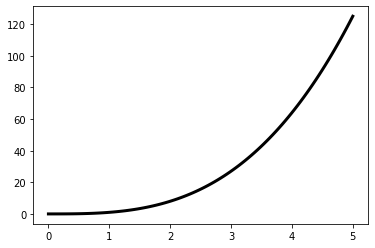

In [3]:
# plotting the function

xmin = 0.0
xmax = 5.0

x = np.linspace( xmin, xmax, 100 )

# plot the function y=x^3
plt.plot(x, x**3.0, color="black", label="function", linewidth=3, zorder=10 )


In [4]:
x0=2.0

In [5]:
# the value of the derivative analytically for this particular function y=x**3
def analytical_deriv(x):
    return 3*x**2
print("y'(2)=",analytical_deriv(x0) )

y'(2)= 12.0


dx=1
13.0
dx=2
16.0
dx=3
21.0


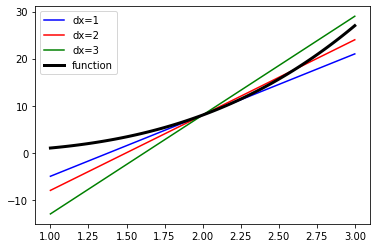

In [6]:
# plotting the slopes of each dx
fig, ax = plt.subplots(1,1)
colors=['blue','red','green']
for i in range(3):
    dx=eval(input('dx='))
    print(derivative(function,x0,dx=dx) )
    # plot the function y=x^3
    x = np.linspace((x0-1.0), (x0+1.0), 100)
    y = derivative(function,x0,dx=dx)*(x - x0) + function(x0)
    ax.plot(x,y,c=colors[i],label='dx='+str(dx))
ax.plot(x, x**3.0, color="black", label="function", linewidth=3, zorder=10 )
ax.legend()
    #plt.show()

### Calculating derivate for many points
QA:
* scipy.misc.derivative does not accept list
* scipy.misc.derivative accepts floats or numpy arrays

In [7]:
#deriv=derivative(np.sin,[2.0,3.0],dx=0.1)
np.sqrt( 1+np.cos(x)**2 )
x=[0,1,2,3,4,5,6,7,8,9] # list
x=np.linspace(0,1,10) # numpy array
deriv=derivative(np.sin,x,dx=0.1)
print(deriv)


[0.99833417 0.99217795 0.97378521 0.94338281 0.90134567 0.84819226
 0.7845781  0.71128776 0.62922512 0.53940225]


### The documentation of the "scipy.misc.derivative" routine says 

* "Given a function, use a central difference formula with spacing dx to compute the nth derivative at x0." (https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)
* So we know how to use it but do we know how it really works?


QA:
There are many schemes to calculate the derivative numerically.
The most popular are three:

<img src="imgs/differences.png" width="300" />

* forward difference:

$$ f'(x_i) \approx \frac{f(x_{x+1}) - f(x_i)}{h} - O(h) $$

* backward difference:

$$ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h} + O(h) $$

* central difference:

$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h^2) $$

$O(h),  O(h^2) $ - errors of the approximations

### Lets make a step back to the definition of the numerical derivative and see where the schemes come from


### initial definition
$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

### Taylor expansion
$$ f(x \pm h) \approx f(x) \pm f'(x)h + \frac{f''(x)h^2}{2} \pm \frac{f'''(x)h^3}{3!} + ...  $$

### Taylor expansion for each sign

$$ f(x + h) \approx f(x) + f'(x)h + \frac{f''(x)h^2}{2} + \frac{f'''(x)h^3}{3!} + ...  $$
$$ f(x - h) \approx f(x) - f'(x)h + \frac{f''(x)h^2}{2} - \frac{f'''(x)h^3}{3!} + ...  $$

### Central difference comes from rearanging the terms of the Taylor expansion 
$$ f'(x) \approx \frac{f(x + h) - f(x-h)}{2h} + \frac{f'''(x)h^3}{3!} $$

hence

$$ f'(x) \approx \frac{f(x + h) - f(x-h)}{2h} + O(h^2) $$

Note that if for example h=0.1 the error is smaller for central difference scheme than for forward of backward difference scheme - hence the central difference scheme is better and used by scipy

### Comparing the three schemes 

<img src="imgs/differences_comparison.png" width="800" />

In [14]:
### Appendix
def deriv(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

        
deriv(function,2.0,method='central',h=0.1)        

12.010000000000009

### Questions
* what is the numerical derivative?
* how does dx influence the error?
* what what are the three (among many) schemes of numerically calculating the derivatives?
* what library offers numerical calculation of the derivative (example)?
* does scipy.misc.derivative accept lists/numpy arrays?
* which scheme this library uses?


## HOMEWORK

Use the scipy.misc.derivative package to numerically find the derivative 
of the following function: 

def myfunc(x,a):
    return a*np.sin(x)
    
where a is an arbitrary variable passed to the routing derivative
*hint read the documentation of the scipy.misc.derivative and check how one can pass arguments to the fuction

Plot the function, the derivative and compare with analytical results of the function for a=1
